In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("Smartphones_cleaned_dataset.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [5]:
df = df.drop(columns=['extended_upto'])

df.dropna(subset=[
    'rating', 'processor_brand', 'num_cores', 'processor_speed',
    'battery_capacity', 'fast_charging', 'num_front_cameras',
    'os', 'primary_camera_front'
], inplace=True)

df.fillna(df.median(numeric_only=True), inplace=True)
df.to_csv("cleaned_smartphones_data.csv", index=False)
df.head()


,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,3,1.0,android,50.0,16.0,0,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,3,1.0,android,64.0,16.0,1,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,3,1.0,android,50.0,13.0,1,1080,2408
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,3,1.0,android,108.0,16.0,0,1080,2412
5,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.2,...,6.60,120,3,1.0,android,50.0,8.0,1,1080,2408


Text(0.5, 1.0, 'Top 10 Smartphone Brands')

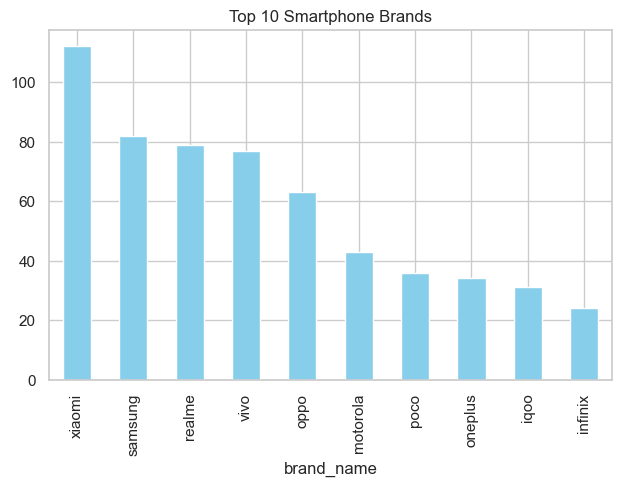

In [23]:

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
df['brand_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Smartphone Brands")



Text(0.5, 1.0, 'Price Distribution')

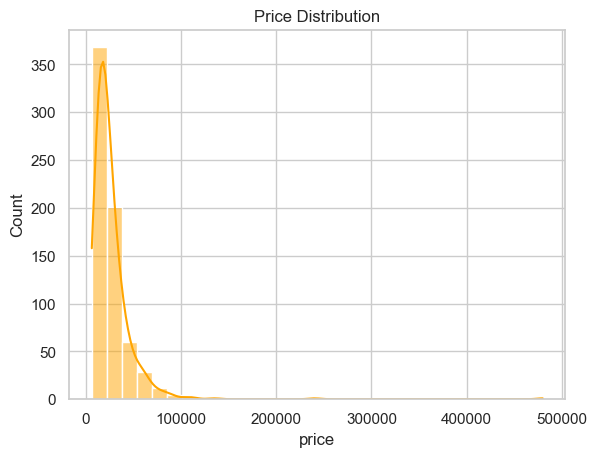

In [21]:


sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title("Price Distribution")

Text(0.5, 1.0, 'Rating vs Price')

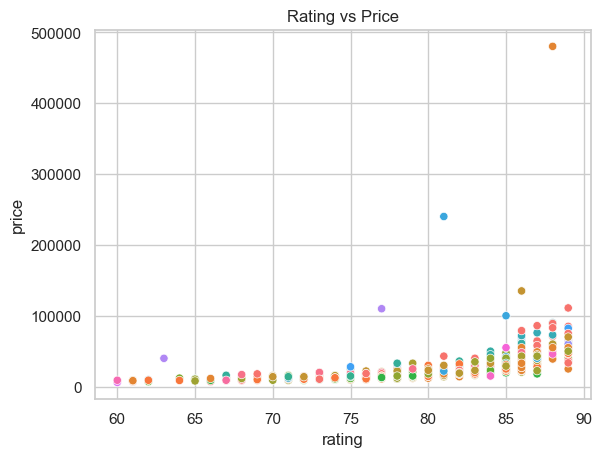

In [19]:

sns.scatterplot(x='rating', y='price', data=df, hue='brand_name', legend=False)
plt.title("Rating vs Price")

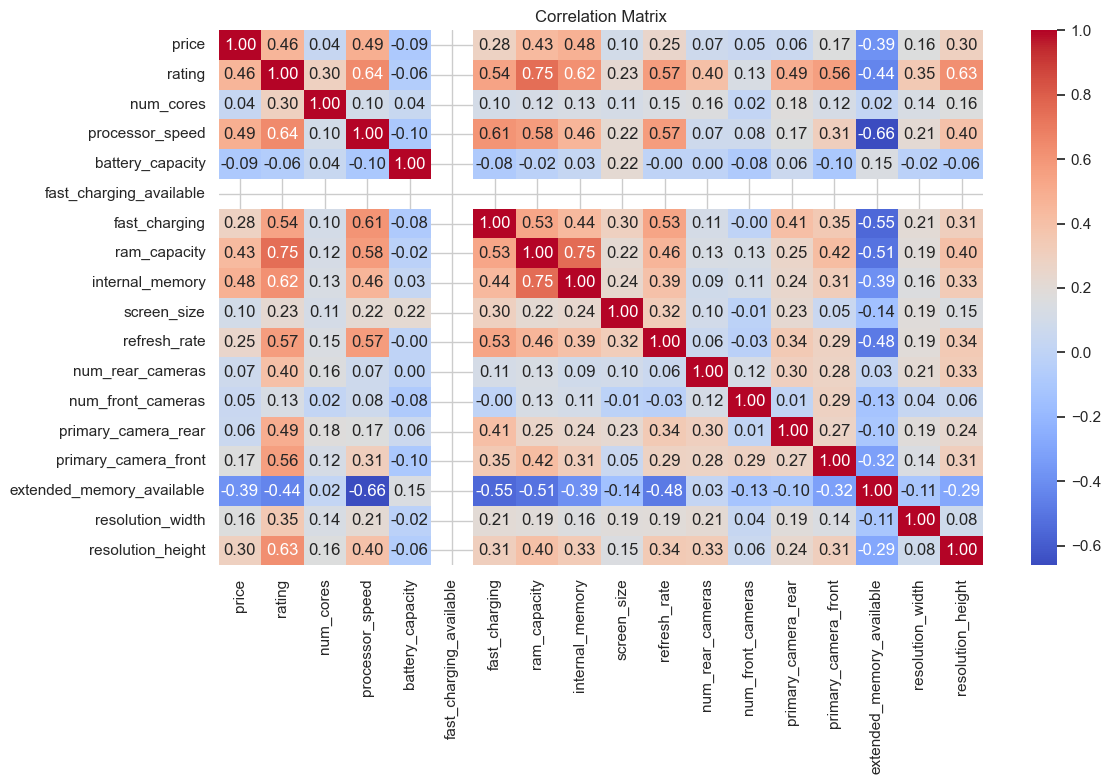

In [25]:
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [29]:

data_encoded = pd.get_dummies(df, columns=['brand_name', 'processor_brand', 'os'], drop_first=True)

X = data_encoded.drop(columns=['model', 'price'])
y = data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)


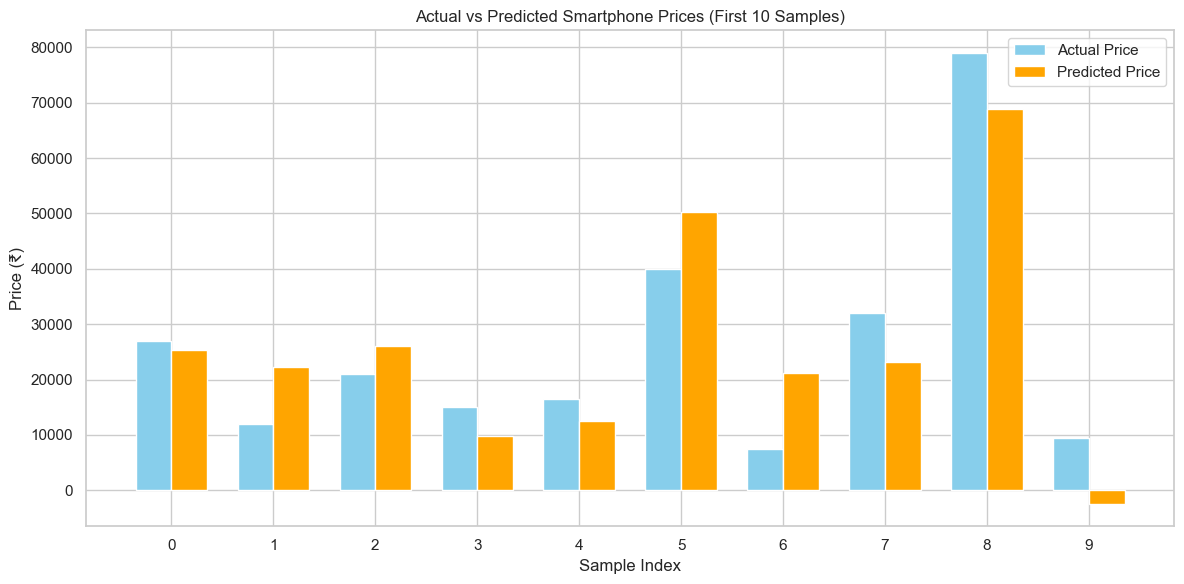

In [39]:
import matplotlib.pyplot as plt
import numpy as np

comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred_lin[:10]
}).reset_index(drop=True)


plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(comparison))

plt.bar(index, comparison['Actual Price'], bar_width, label='Actual Price', color='skyblue')
plt.bar(index + bar_width, comparison['Predicted Price'], bar_width, label='Predicted Price', color='orange')

plt.xlabel('Sample Index')
plt.ylabel('Price (₹)')
plt.title('Actual vs Predicted Smartphone Prices (First 10 Samples)')
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.tight_layout()
plt.show()
